<a href="https://colab.research.google.com/github/amulyakamatagi/python-moments-of-business/blob/main/CUSTOMER_SEGMENTATION(Mini_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING THE LABRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
table=pd.read_csv("Mall_Customers.csv")
table.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
5,6,Female,22,17,76
4,5,Female,31,17,40
69,70,Female,32,48,47
196,197,Female,45,126,28
187,188,Male,28,101,68


# UNDERSTANDING THE DATA

In [3]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
table.isnull().sum()*100

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: >

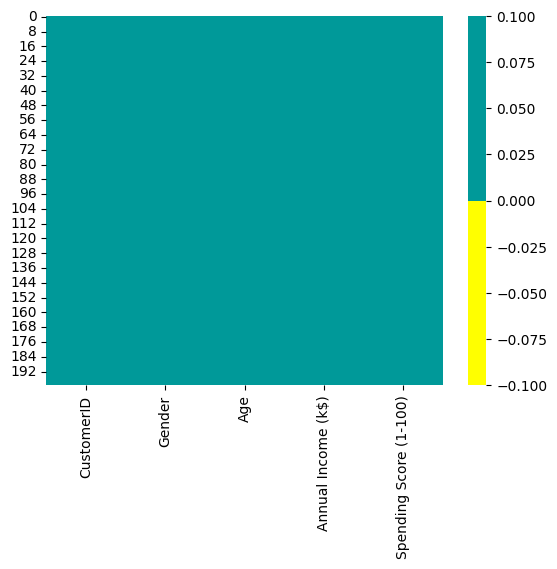

In [5]:
cols=table.columns
color=['#ffff00','#009999']
sns.heatmap(table[cols].isnull(),cmap=sns.color_palette(color))

In [6]:
table.groupby(['Gender']).agg({"Annual Income (k$)":["mean","min","max","sum"]})

Annual Income (k$)               
                     mean min  max   sum
Gender                                  
Female          59.250000  16  126  6636
Male            62.227273  15  137  5476

In [7]:
table.groupby(['Gender']).agg({"Spending Score (1-100)":["mean","min","max","sum"]})

Spending Score (1-100)              
                         mean min max   sum
Gender                                     
Female              51.526786   5  99  5771
Male                48.511364   1  97  4269

Text(0.5, 0, 'Spending Hours')

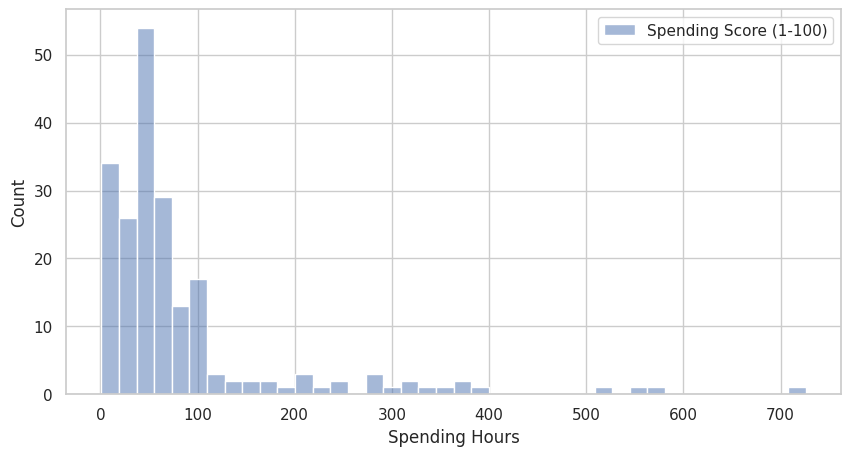

In [8]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.histplot(table.groupby(['Age']).agg({"Spending Score (1-100)":["mean","min","max","sum"]}))
plt.xlabel("Spending Hours")

Text(0.5, 0, 'Annual Income(k$)')

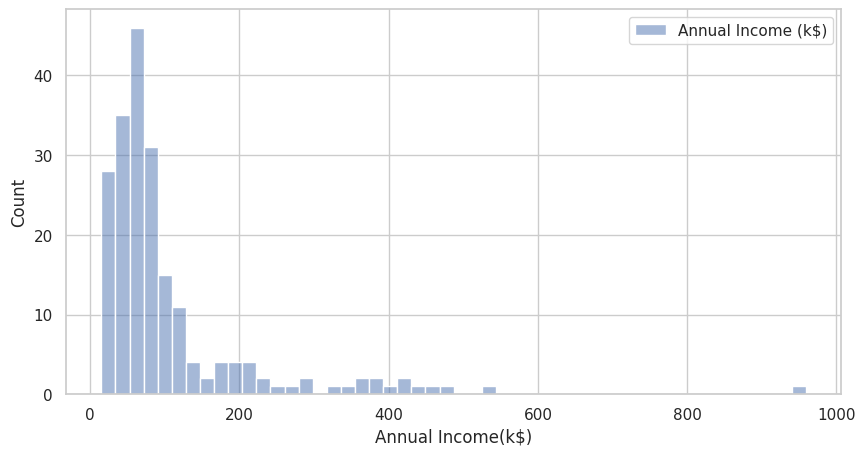

In [9]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.histplot(table.groupby(['Age']).agg({"Annual Income (k$)":["mean","min","max","sum"]}))
plt.xlabel("Annual Income(k$)")

# STATISTICAL OVERVIEW

In [10]:
a=table["Age"]
b=table["Annual Income (k$)"]
c=table["Spending Score (1-100)"]

<ipython-input-11-91f2af97a806>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a,hist=False)


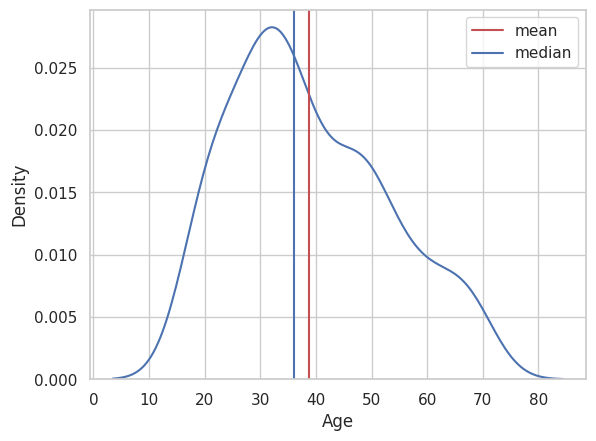

In [11]:
mean=a.mean()
median=a.median()
sns.distplot(a,hist=False)
plt.axvline(mean,color="r",label="mean")
plt.axvline(median,color="b",label="median")
plt.legend()
plt.show()

<ipython-input-12-0534ba0f0ea1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(b,hist=False)


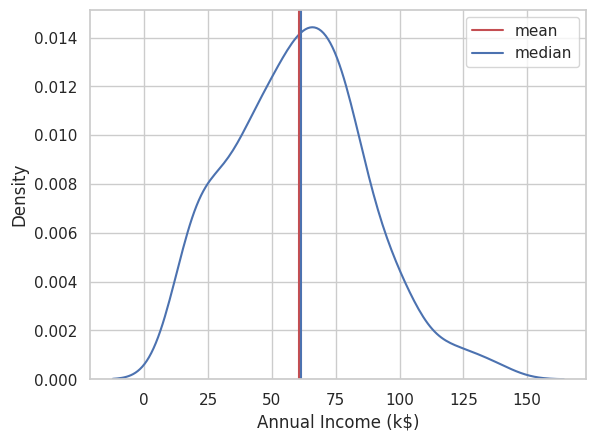

In [12]:
mean=b.mean()
median=b.median()
sns.distplot(b,hist=False)
plt.axvline(mean,color="r",label="mean")
plt.axvline(median,color="b",label="median")
plt.legend()
plt.show()

<ipython-input-13-26c2bc84abc3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c,hist=False)


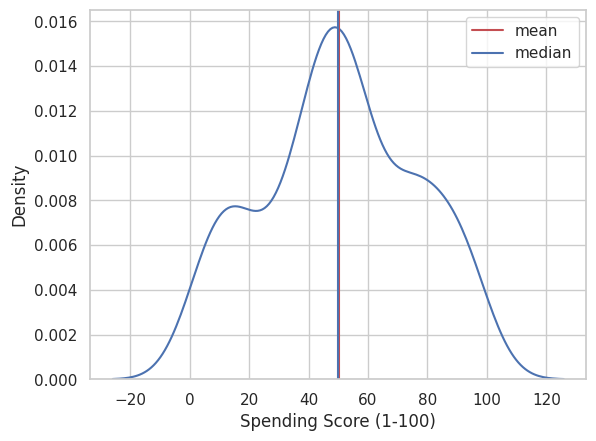

In [13]:
mean=c.mean()
median=c.median()
sns.distplot(c,hist=False)
plt.axvline(mean,color="r",label="mean")
plt.axvline(median,color="b",label="median")
plt.legend()
plt.show()

In [14]:
crosstab=pd.crosstab(table["Age"],table["Annual Income (k$)"])

total_income_by_age=crosstab.dot(crosstab.columns)
highest_income_age_group=total_income_by_age.idxmax()
highest_income_amount=total_income_by_age.max()
print(f"the age group earning more income is {highest_income_age_group} with income of {highest_income_amount}$")

the age group earning more income is 32 with income of 959$


In [15]:
crosstab=pd.crosstab(table["Age"],table["Spending Score (1-100)"])

total_spending_by_age=crosstab.sum(axis=1)

highest_spending_age_group=total_spending_by_age.idxmax()
income_amount=total_spending_by_age.max()

print(f"the age group apending more  is {highest_spending_age_group} with income of {income_amount}$")

the age group apending more  is 32 with income of 11$


# DATA VISUALIZATION

<Figure size 900x500 with 0 Axes>

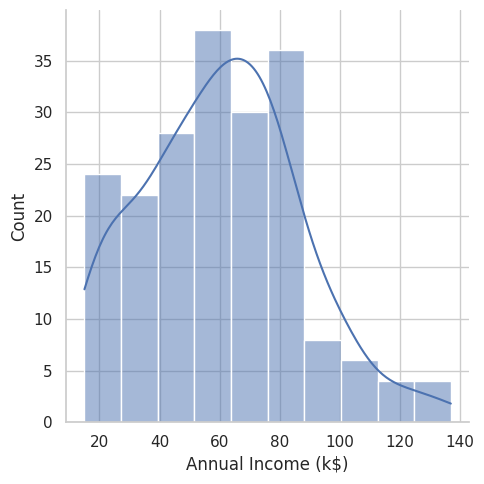

In [16]:
# Univariate Analysis

plt.figure(figsize=(9,5))
sns.displot(table,x="Annual Income (k$)",kde=True)

<Figure size 900x500 with 0 Axes>

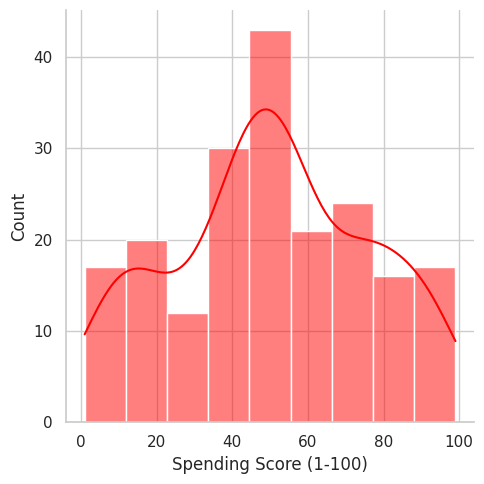

In [17]:
plt.figure(figsize=(9,5))
sns.displot(table,x="Spending Score (1-100)",kde=True,color="red")

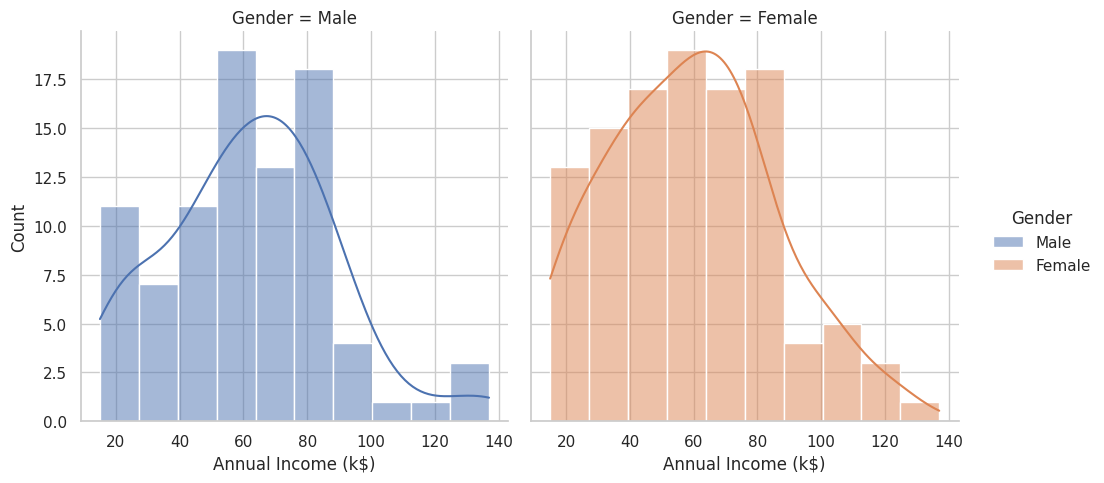

In [21]:
# Bivariate Analysis

sns.displot(table, x="Annual Income (k$)", col="Gender",hue="Gender",kde=True)

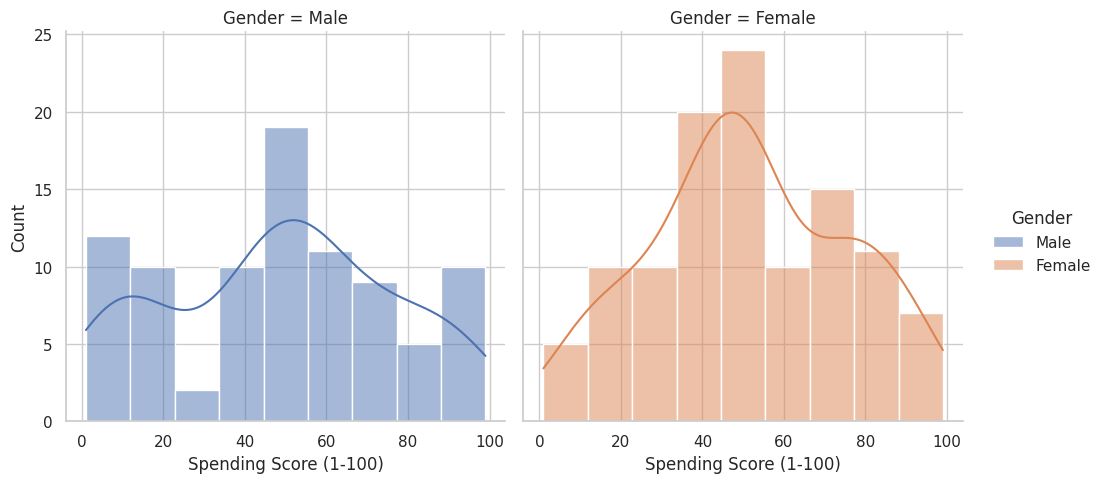

In [20]:
sns.displot(table, x="Spending Score (1-100)", col="Gender",hue="Gender",kde=True)

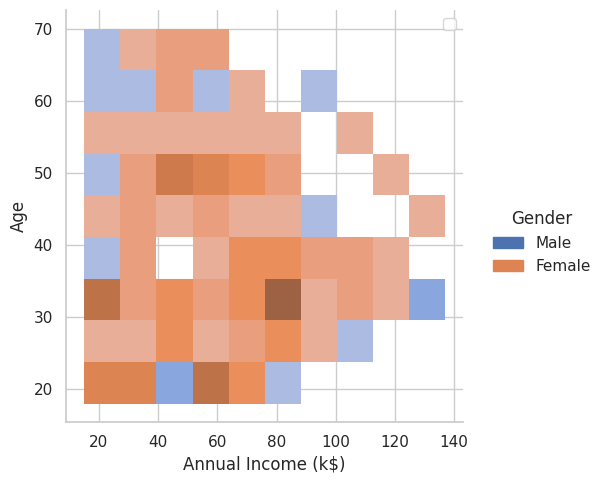

In [28]:
sns.displot(table,x="Annual Income (k$)",y="Age",hue="Gender")
plt.legend()
plt.show()

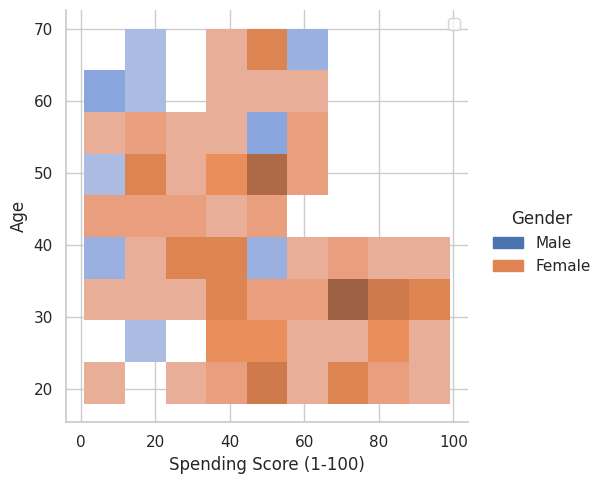

In [29]:
sns.displot(table,x="Spending Score (1-100)",y="Age",hue="Gender")
plt.legend()
plt.show()

# INFERENCE:
* The Annual Income of Female seems to be more compared to Male Annual Income ratio same as spending ratio
* from the above plot , we can also say that male and female within the (30-34) age has the highest spending ratio .
* However , spending ratio of female is more than male
* lowest spending age group of both male and female lies in the range of (60-74)
* To sum up , male and female falling under the age of 32 have the record of spending higher with 11k$


# DATA PREPROCESSING

In [31]:
data=table.iloc[:,[3,4]]

In [32]:
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
162,81,5
107,63,46
192,113,8
114,65,48
160,79,35


In [46]:
x=data.values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [36]:
from sklearn.preprocessing import StandardScaler
trans=StandardScaler()
scaled_data=pd.DataFrame(trans.fit_transform(data))
scaled_data

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


Text(0.5, 1.0, 'AFTER SCALING')

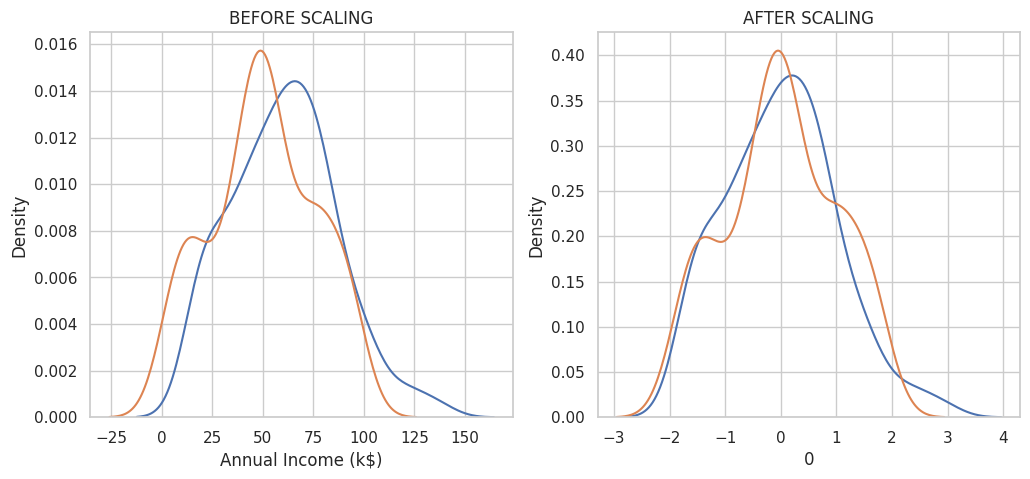

In [41]:
# visualizing the effects of scaling

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(table["Annual Income (k$)"],ax=ax1)
sns.kdeplot(table["Spending Score (1-100)"],ax=ax1)
ax1.set_title("BEFORE SCALING")

sns.kdeplot(scaled_data[0],ax=ax2)
sns.kdeplot(scaled_data[1],ax=ax2)
ax2.set_title("AFTER SCALING")

# KMEANS CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0.5, 1.0, 'SCREE PLOT')

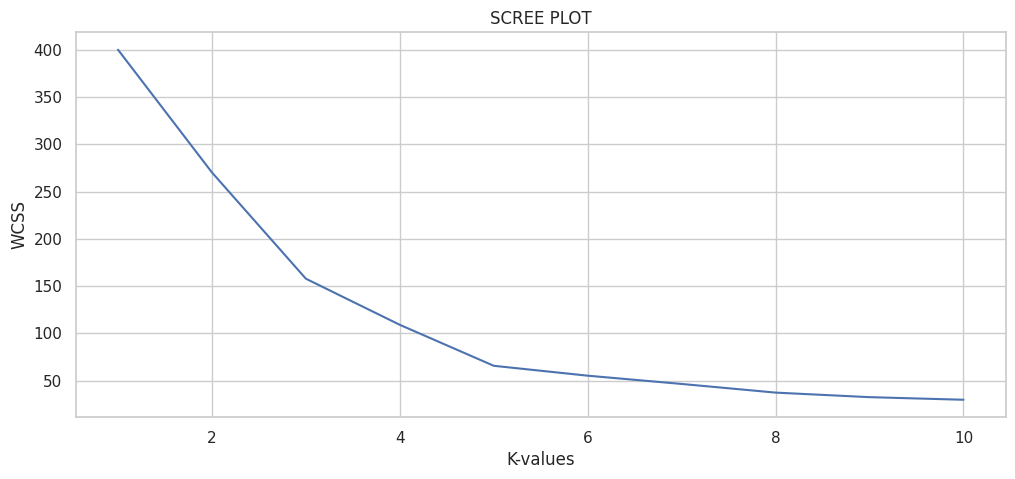

In [42]:
from sklearn.cluster import KMeans
plt.figure(figsize=(12,5))
wcss=[]
for i in range(1,11):
  clf=KMeans(n_clusters=i)
  clf.fit(scaled_data)
  wcss.append(clf.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("K-values")
plt.ylabel("WCSS")
plt.title("SCREE PLOT")

In [47]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)
y=kmeans.fit_predict(x)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

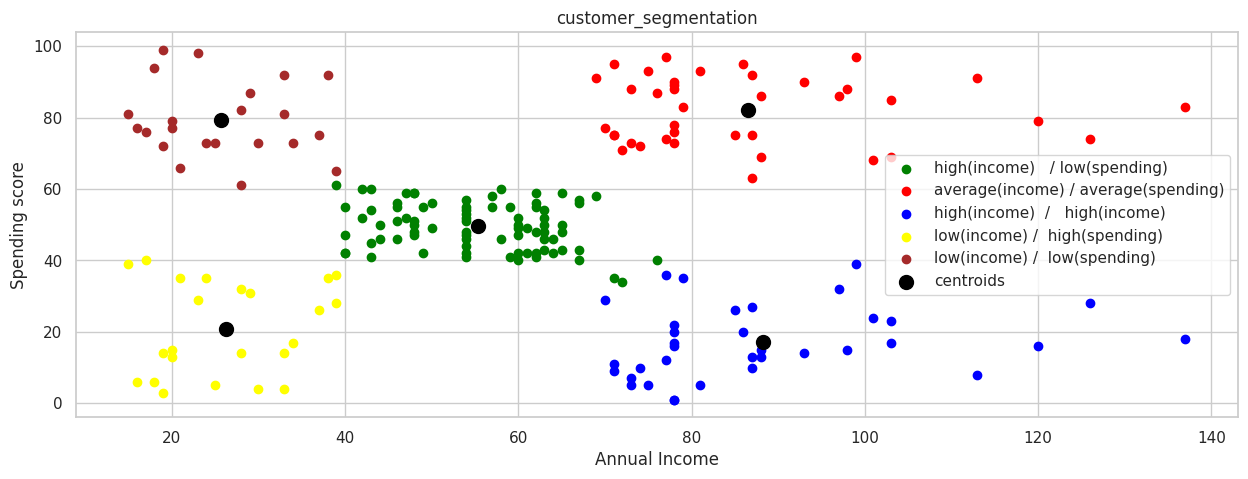

In [50]:
plt.figure(figsize=(15,5))

plt.scatter(x[y==0,0],x[y==0,1],c="green",label="high(income)   / low(spending)")
plt.scatter(x[y==1,0],x[y==1,1],c="red",label="average(income) / average(spending)")
plt.scatter(x[y==2,0],x[y==2,1],c="blue",label="high(income)  /   high(income)")
plt.scatter(x[y==3,0],x[y==3,1],c="yellow",label="low(income) /  high(spending)")
plt.scatter(x[y==4,0],x[y==4,1],c="brown",label="low(income) /  low(spending)")


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="centroids")
plt.title("customer_segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

In [ ]:
KEY TAKEAWAYS
customers with high income and but with low spending ratio belong to cluster 1
customers with average income and average spending belong to cluster 2
customers with high income and high spending belong to cluster 3
customers with low income and high spending belong to cluster 4
customers with low income and low spending belong to cluster 5

# KEY TAKEAWAYS


* customers with high income and but with low spending ratio belong to cluster 1
* customers with average income and average spending belong to cluster 2
* customers with high income and high spending belong to cluster 3
* customers with low income and high spending belong to cluster 4
* customers with low income and low spending belong to cluster 5